In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("adult.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

In [4]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [7]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

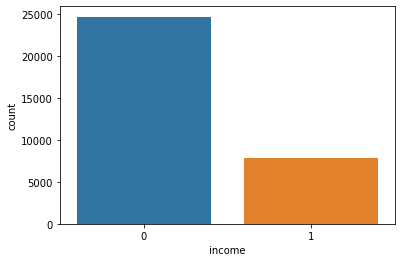

In [8]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
plt.show()

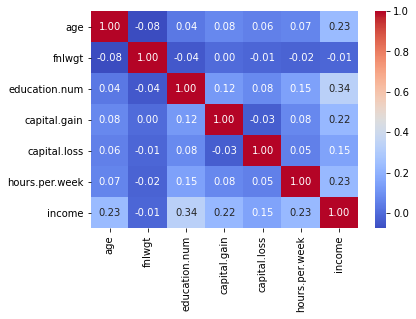

In [9]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

/Users/nalisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nalisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


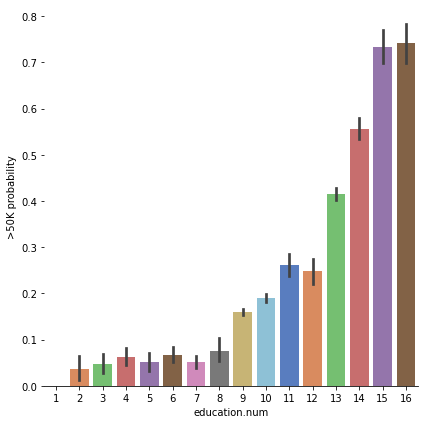

In [10]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

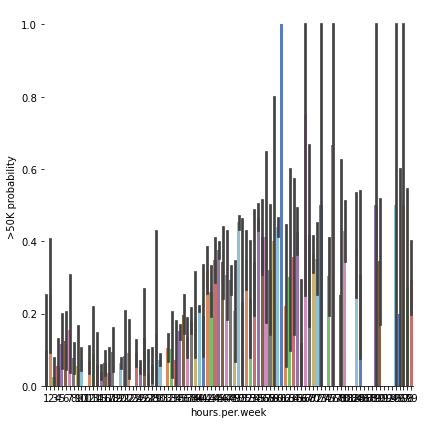

In [11]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

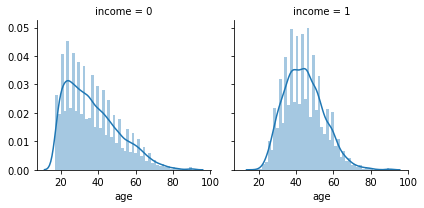

In [12]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

In [13]:
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

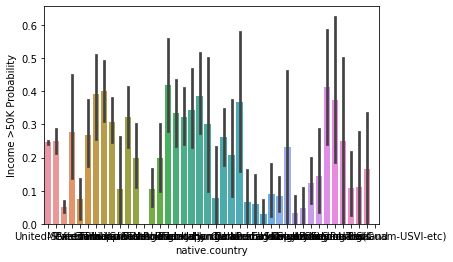

In [14]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

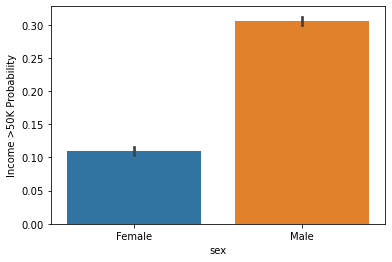

In [15]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/Users/nalisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nalisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


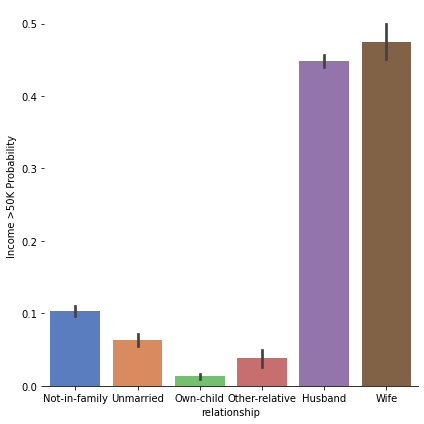

In [16]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

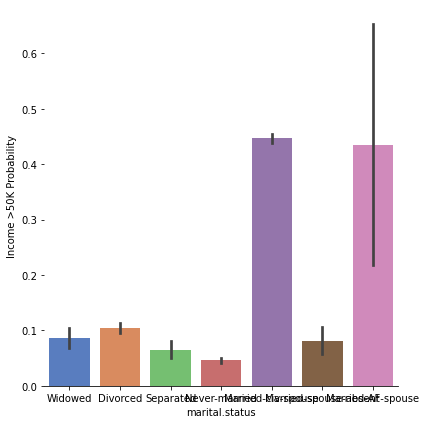

In [17]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

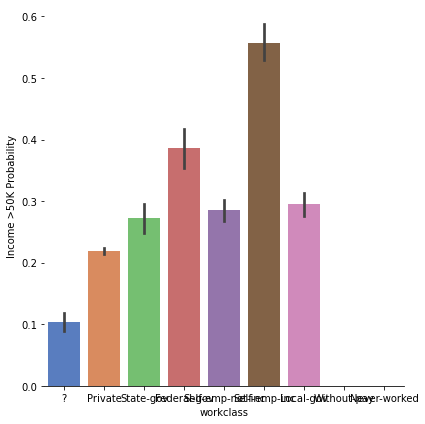

In [18]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [19]:
 #Convert Sex value to 0 and 1
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})
# Feature Engineering
# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})


In [20]:
# Calculate the Entropy
def entropy(target_col):      
    elements,counts = np.unique(target_col,return_counts = True)  
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])  
    return entropy  


In [21]:
# Calculate the Information Gain
def InformationGain(data,split_attribute_name,target_name="income"):           
    #Calculate the entropy 
    total_entropy = entropy(data[target_name])        
    #Calculate the values and the corresponding counts for the split attribute   
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)  
    #Calculate the weighted entropy  
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])  
    #Calculate the information gain  
    Information_Gain = total_entropy - Weighted_Entropy  
    return Information_Gain  

In [22]:
def DecisionTree(data,originaldata,features,target_attribute_name="income",parent_node_class = None):    
    #If all target_values have the same value, return the value  
    if len(np.unique(data[target_attribute_name])) <= 1:  
        return np.unique(data[target_attribute_name])[0]        
    #If the dataset is empty, return the mode target feature value in the original dataset  
    elif len(data)==0:  
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]        
    #If the feature space is empty, return the mode target feature value of the direct parent node
    elif len(features) ==0:  
        return parent_node_class        
    #If none of the above holds true, grow the tree!     
    else:  
        #Set the default value as the current node  
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]            
        #Select the feature which best splits the dataset  
        item_values = [InformationGain(data,feature,target_attribute_name) for feature in features] 
        best_feature_index = np.argmax(item_values)  
        best_feature = features[best_feature_index]  
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information   
        tree = {best_feature:{}}
        #Remove the feature with the best inforamtion gain from the feature space  
        features = [i for i in features if i != best_feature]            
        #Grow a branch under the root node for each possible value of the root node feature            
        for value in np.unique(data[best_feature]):  
            value = value  
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets  
            sub_data = data.where(data[best_feature] == value).dropna()     
            #Define the stopping point 
            print('Do you want to stop? Y or N')
            Input = input() 
            if Input == "Y":
                return(tree)
            #Call the algorithm for each of those sub_datasets with the new parameters 
            subtree = DecisionTree(sub_data,dataset,features,target_attribute_name,parent_node_class)        
            #Add the sub tree, grown from the sub_dataset to the tree under the root node  
            tree[best_feature][value] = subtree                
        return(tree)

In [23]:
def DC_tree(data,originaldata,features,Theta,target_attribute_name="income",parent_node_class = None):    
    #If all target_values have the same value, return the value  
    if len(np.unique(data[target_attribute_name])) <= 1:  
        return np.unique(data[target_attribute_name])[0]        
    #If the dataset is empty, return the mode target feature value in the original dataset  
    elif len(data)==0:  
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]        
    #If the feature space is empty, return the mode target feature value of the direct parent node
    elif len(features) ==0:  
        return parent_node_class        
    #If none of the above holds true, grow the tree!     
    else:  
        #Set the default value as the current node  
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]            
        #Select the feature which best splits the dataset  
        item_values = [InformationGain(data,feature,target_attribute_name) for feature in features] 
        best_feature_index = np.argmax(item_values)  
        best_feature = features[best_feature_index]
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information   
        tree = {best_feature:{}}  
        #Define the stopping point 
        if best_feature < Theta:
            return(tree)
        #Remove the feature with the best inforamtion gain from the feature space  
        features = [i for i in features if i != best_feature]            
        #Grow a branch under the root node for each possible value of the root node feature            
        for value in np.unique(data[best_feature]):  
            value = value  
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets  
            sub_data = data.where(data[best_feature] == value).dropna()     
            #Call the algorithm for each of those sub_datasets with the new parameters 
            subtree = DecisionTree(sub_data,dataset,features,target_attribute_name,parent_node_class)        
            #Add the sub tree, grown from the sub_dataset to the tree under the root node  
            tree[best_feature][value] = subtree                
        return(tree)


In [24]:
# Calculate the predict value
def predict(query,tree,default = 1):      
    for key in list(query.keys()):  
        if key in list(tree.keys()):  
            try:  
                result = tree[key][query[key]]   
            except:  
                return default  
            result = tree[key][query[key]]  
            if isinstance(result,dict):  
                return predict(query,result)  
            else:  
                return result  


In [25]:
# Split the data
def train_validation_test(dataset):  
    m = len(dataset)
    train_end = int(0.7 * m)
    validate_end = int(0.1 * m) + train_end
    train = dataset[:train_end]
    validate = dataset[train_end:validate_end]
    test = dataset[validate_end+1:]
    return train,validate,test  
train = train_validation_test(dataset)[0] 
validate = train_validation_test(dataset)[1] 
test = train_validation_test(dataset)[2]   


In [26]:
# Calculate the accuracy
def accuracy(data,tree):  
    #Create new query instances by simply removing the target feature column from the original dataset and convert it to a dictionary  
    queries = data.iloc[:,:-1].to_dict(orient = "records")        
    #Create an empty DataFrame in whose columns the prediction of the tree are stored  
    predicted = pd.DataFrame(columns=["predicted"])         
    #Calculate the prediction accuracy  
    for i in range(len(data)):  
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)   
    return (np.sum(predicted["predicted"].reset_index(drop=True) == data["income"].reset_index(drop=True))/len(data))*100

In [27]:
# The user decied when to stop 
tree = DecisionTree(train,train,train.columns[:-1])    
accuracy = accuracy(test,tree)
print("The accuracy with user decied when to stop", accuracy)

Do you want to stop? Y or N
N
Do you want to stop? Y or N
N
Do you want to stop? Y or N
N
Do you want to stop? Y or N
N
Do you want to stop? Y or N
N
Do you want to stop? Y or N
Y
The accuracy with user decied when to stop 19.21068796068796


In [ ]:
# Using cut_off
train_errors = []
best_accuracy = 0
Theta = [0.2, 0.4, 0.6, 0.8]
# Calculate the best value by using Theta
for O in Theta:
    tree = DC_tree(train,train,train.columns[:-1], O)
    accuracy = accuracy(validate,tree)
    train_errors.append(accuracy)
    if (best_accuracy < accuracy):
        best_accuracy = accuracy
        best_Theta = O

In [ ]:
# Plot the Train Error
plt.plot(Theta, train_errors, label='Training Error')
plt.xlabel('Theta')
plt.ylabel('Total Error')
plt.legend()
plt.plot()

In [ ]:
# Run the algorithm with the best accuracy and test set
tree = DC_tree(train,train,train.columns[:-1], best_Theta)    
test_error = accuracy(test,tree)
print("Best accuracy and test set", test_error)

# Plot the Train Error with the test error
plt.plot(Theta, train_errors, label='Training Error')
plt.plot(Theta, test_error, label='Test Error')
plt.xlabel('Theta')
plt.ylabel('Total Error')
plt.legend()
plt.plot()

In [ ]:
#Conclusion
# Calculating entropy and information gain.
# C4.5 creates more generalized trees and not to fall into overfitting
# Use validation set to calculate the best_theta and the best splitting tree.
# best_theta is use to calculate the accuracy on the test set.
# Decision trees may not provide the optimal classification.